<a href="https://colab.research.google.com/github/blinov-89/Tula_CatBoostRegressor/blob/main/Tula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Установка catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
#import необходимых модулей

import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# data

In [ ]:
#Считывание данных в DataFrame 

test = pd.read_csv('/content/drive/MyDrive/Тула ИИ/test_dataset_test.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str})

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Тула ИИ/train_dataset_train.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str, 'PATIENT_ID_COUNT':int})

In [ ]:
# train = pd.read_csv('/content/drive/MyDrive/Тула ИИ/train_dataset_train.csv', sep=';')

# анализ

In [ ]:
train

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00.0,Гурьевск,8.21,young,1
1,0,A00.0,Калининград,3.20,children,1
2,0,A00,Гусев,3.19,children,1
3,0,A00,Калининград,1.22,children,1
4,0,A00,Калининград,2.18,children,1
...,...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,12.21,children,1
2212389,1,Z99.8,Калининград,10.21,young,1
2212390,1,Z99.9,Калининград,4.19,children,2
2212391,1,Z99.9,Калининград,8.19,children,1


In [ ]:
train.describe()

,PATIENT_ID_COUNT
count,2.212393e+06
mean,5.847853e+00
std,6.042780e+01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.353200e+04


In [ ]:
train.describe(include=[object])

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY
count,2212393,2212393,2212393,2212393,2212393
unique,2,7644,118,51,6
top,0,J06.9,Калининград,10.19,young
freq,1316709,19100,617129,63145,552363


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212393 entries, 0 to 2212392
Data columns (total 6 columns):
 #   Column            Dtype  
---  ------            -----  
 0   PATIENT_SEX       int64  
 1   MKB_CODE          object 
 2   ADRES             object 
 3   VISIT_MONTH_YEAR  float64
 4   AGE_CATEGORY      object 
 5   PATIENT_ID_COUNT  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 101.3+ MB


In [ ]:
train['PATIENT_ID_COUNT'].value_counts()

1       1366778
2        318988
3        136250
4         77480
5         50492
         ...   
1241          1
4501          1
1166          1
1415          1
6733          1
Name: PATIENT_ID_COUNT, Length: 1688, dtype: int64

In [ ]:
train['PATIENT_SEX'].value_counts()

0    1316709
1     895684
Name: PATIENT_SEX, dtype: int64

In [ ]:
train['MKB_CODE'].value_counts()

J06.9    19100
I11.9    17282
Z00.0    15419
Z02.7    13458
K02.1    13132
         ...  
D76.1        1
Z44.3        1
D80.7        1
D82.9        1
Z96.2        1
Name: MKB_CODE, Length: 7644, dtype: int64

In [ ]:
train['ADRES'].value_counts()

Калининград           617129
Гурьевск              116111
Светлый                85748
Пионерский             84932
Советск                78466
                       ...  
Ясная Поляна            2670
Малинники               2649
Гурьевский              2635
СТ Радуга               2588
СТ Железнодорожник      2517
Name: ADRES, Length: 118, dtype: int64

In [ ]:
train['AGE_CATEGORY'].value_counts()

young           552363
elderly         514680
middleage       438426
children        430511
old             214493
centenarians     61920
Name: AGE_CATEGORY, dtype: int64

# **дата**

In [ ]:
train

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY,PATIENT_ID_COUNT
0,0,A00.0,Гурьевск,08.21,young,1
1,0,A00.0,Калининград,03.20,children,1
2,0,A00,Гусев,03.19,children,1
3,0,A00,Калининград,01.22,children,1
4,0,A00,Калининград,02.18,children,1
...,...,...,...,...,...,...
2212388,1,Z99.1,Гурьевск,12.21,children,1
2212389,1,Z99.8,Калининград,10.21,young,1
2212390,1,Z99.9,Калининград,04.19,children,2
2212391,1,Z99.9,Калининград,08.19,children,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212393 entries, 0 to 2212392
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   PATIENT_SEX       object
 1   MKB_CODE          object
 2   ADRES             object
 3   VISIT_MONTH_YEAR  object
 4   AGE_CATEGORY      object
 5   PATIENT_ID_COUNT  int64 
dtypes: int64(1), object(5)
memory usage: 101.3+ MB


In [ ]:
train['day'] = '01.'

In [ ]:
train['VISIT_MONTH_YEAR']=train['VISIT_MONTH_YEAR'].astype(str)

In [ ]:
train['VISIT_MONTH_YEAR'] = train['day'] +  train['VISIT_MONTH_YEAR']

In [ ]:
train['VISIT_MONTH_YEAR'] = pd.to_datetime(train['VISIT_MONTH_YEAR'], dayfirst=True)

In [ ]:
train = train.drop('day', axis=1)

In [ ]:
# train['VISIT_MONTH_YEAR'].str[:1]

In [ ]:
# train['VISIT_MONTH_YEAR'].str[2:]

In [ ]:
pd.to_datetime(train['VISIT_MONTH_YEAR']).dt.month

0           8
1           3
2           3
3           1
4           2
           ..
2212388    12
2212389    10
2212390     4
2212391     8
2212392    11
Name: VISIT_MONTH_YEAR, Length: 2212393, dtype: int64

In [ ]:
pd.to_datetime(train['VISIT_MONTH_YEAR']).dt.year.value_counts()

2019    697635
2018    669456
2021    391444
2020    367469
2022     86389
Name: VISIT_MONTH_YEAR, dtype: int64

#анализ

In [ ]:
# превратим дату в индекс и сделаем изменение постоянным
train.set_index('VISIT_MONTH_YEAR', inplace = True)
train.head()

,PATIENT_SEX,MKB_CODE,ADRES,AGE_CATEGORY,PATIENT_ID_COUNT
VISIT_MONTH_YEAR,,,,,
2021-08-01,0,A00.0,Гурьевск,young,1
2020-03-01,0,A00.0,Калининград,children,1
2019-03-01,0,A00,Гусев,children,1
2022-01-01,0,A00,Калининград,children,1
2018-02-01,0,A00,Калининград,children,1


In [ ]:
train.resample(rule = 'AS').mean().head()

,PATIENT_ID_COUNT
VISIT_MONTH_YEAR,
2018-01-01,4.524756
2019-01-01,4.626606
2020-01-01,6.760440
2021-01-01,9.063258
2022-01-01,7.511755


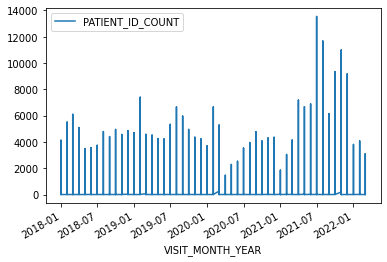

In [ ]:
train.plot()

[Text(0, 0.5, 'Количество пациентов'),
 Text(0.5, 0, 'Месяцы'),
 Text(0.5, 1.0, 'Пациенты')]

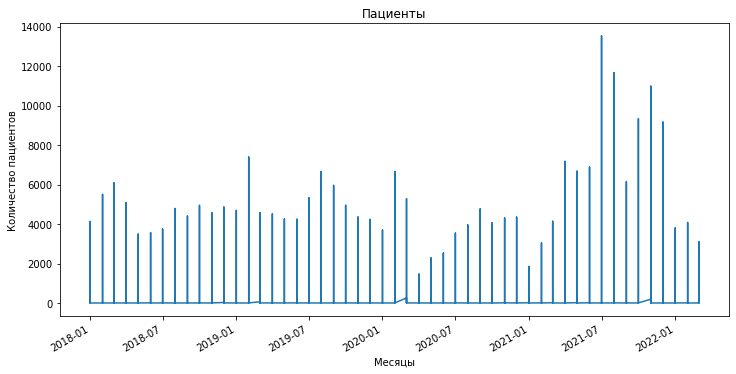

In [ ]:
ax = train.plot(figsize = (12,6), legend = None)
ax.set(title = 'Пациенты', xlabel = 'Месяцы', ylabel = 'Количество пациентов')

# Тренировка

In [ ]:
CAT_COLS = ["PATIENT_SEX",	"MKB_CODE",	"ADRES",	"AGE_CATEGORY"]
FTS_COLS = ["PATIENT_SEX",	"MKB_CODE",	"ADRES",	"AGE_CATEGORY"]
TARGET = "target"

In [ ]:
import catboost as cb

In [ ]:
model = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31, \
                            depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)


model.fit(full_features["tr"][FTS_COLS], full_features["tr"][TARGET],
          eval_set=(full_features["val"][FTS_COLS], full_features["val"][TARGET]), cat_features=CAT_COLS)

In [ ]:
model = CatBoostRegressor(cat_features=CAT_COLS)

model.fit(full_features["tr"][FTS_COLS], full_features["tr"][TARGET],
          eval_set=(full_features["val"][FTS_COLS], full_features["val"][TARGET]))

In [ ]:
pd.Series(model.feature_importances_, index=FTS_COLS).sort_values(ascending=False)

MKB_CODE        42.484632
ADRES           28.809975
AGE_CATEGORY    23.184464
PATIENT_SEX      5.520928
dtype: float64

In [ ]:
tr_preds = model.predict(full_features["tr"][FTS_COLS])
val_preds = model.predict(full_features["val"][FTS_COLS])
ts_preds = model.predict(full_features["ts"][FTS_COLS])

In [ ]:
#На локальном тестировании модель выдаёт такой результат

print("Значение метрики R2 на test: ", r2_score(full_features["tr"][TARGET], tr_preds))

Значение метрики R2 на test:  0.8340005278606266


In [ ]:
#На локальном тестировании модель выдаёт такой результат

print("Значение метрики R2 на test: ", r2_score(full_features["val"][TARGET], val_preds))

Значение метрики R2 на test:  0.34957029079299906


In [ ]:
#На локальном тестировании модель выдаёт такой результат

print("Значение метрики R2 на test: ", r2_score(full_features["ts"][TARGET], ts_preds))

Значение метрики R2 на test:  0.43924535387195995


In [ ]:
full_features["tr"][FTS_COLS]

,PATIENT_SEX,MKB_CODE,ADRES,AGE_CATEGORY
0,0,A00,Гусев,children
1,0,A00,Калининград,children
2,0,A00,Калининград,elderly
3,0,A00,Калининград,middleage
4,0,A00,Калининград,old
...,...,...,...,...
2844340,1,Z98.8,Черняховск,elderly
2844341,1,Z98.8,Янтарный,young
2844342,1,Z99.1,Гурьевск,children
2844343,1,Z99.8,Калининград,young


In [ ]:
test

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY
0,0,A00,Калининград,04.22,children
1,0,A00,Калининград,04.22,elderly
2,0,A00,Калининград,04.22,middleage
3,0,A00,Калининград,04.22,young
4,0,A01,Калининград,04.22,middleage
...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly
39369,1,Z96.6,Гусев,04.22,middleage
39370,1,Z96.7,Гусев,04.22,young
39371,1,Z98.8,Озерск,04.22,children


In [ ]:
#Получение ответов

y_pred_solution = model.predict(test)

In [ ]:
#Вот так они выглядят

y_pred_solution.astype(int)

array([ 0,  2,  2, ...,  0, -1,  0])

In [ ]:
#Формируем sample_solution для отправки на платформу

test['PATIENT_ID_COUNT'] = y_pred_solution.astype(int)

In [ ]:
#Сохраняем в csv файл
 
test.to_csv('sample_solution.csv', sep=';', index=None)

#test

In [ ]:
test

,PATIENT_SEX,MKB_CODE,ADRES,VISIT_MONTH_YEAR,AGE_CATEGORY
0,0,A00,Калининград,04.22,children
1,0,A00,Калининград,04.22,elderly
2,0,A00,Калининград,04.22,middleage
3,0,A00,Калининград,04.22,young
4,0,A01,Калининград,04.22,middleage
...,...,...,...,...,...
39368,1,Z96.6,Балтийск,04.22,elderly
39369,1,Z96.6,Гусев,04.22,middleage
39370,1,Z96.7,Гусев,04.22,young
39371,1,Z98.8,Озерск,04.22,children


In [ ]:
test['VISIT_MONTH_YEAR']

0        04.22
1        04.22
2        04.22
3        04.22
4        04.22
         ...  
39368    04.22
39369    04.22
39370    04.22
39371    04.22
39372    04.22
Name: VISIT_MONTH_YEAR, Length: 39373, dtype: object

In [ ]:
test['day'] = '01.'

In [ ]:
test['VISIT_MONTH_YEAR']=test['VISIT_MONTH_YEAR'].astype(str)

In [ ]:
test['VISIT_MONTH_YEAR'] = test['day'] +  test['VISIT_MONTH_YEAR']

In [ ]:
test['VISIT_MONTH_YEAR'] = pd.to_datetime(test['VISIT_MONTH_YEAR'], dayfirst=True)

In [ ]:
test = test.drop('day', axis=1)

In [ ]:
# train['VISIT_MONTH_YEAR'].str[:1]

In [ ]:
# train['VISIT_MONTH_YEAR'].str[2:]

In [ ]:
pd.to_datetime(test['VISIT_MONTH_YEAR']).dt.month.value_counts()

4    39373
Name: VISIT_MONTH_YEAR, dtype: int64

In [ ]:
pd.to_datetime(test['VISIT_MONTH_YEAR']).dt.year.value_counts()

2022    39373
Name: VISIT_MONTH_YEAR, dtype: int64

In [ ]:
# AGG_COLS =  ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY']

In [ ]:
# train_ts = train.groupby(AGG_COLS + ["VISIT_MONTH_YEAR"])["PATIENT_ID_COUNT"].sum().unstack(fill_value=0)

In [ ]:
# train[train['VISIT_MONTH_YEAR']].groupby(['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'], as_index=False)['PATIENT_ID_COUNT']

In [ ]:
# test_ts = test.groupby(AGG_COLS + ["VISIT_MONTH_YEAR"])["PATIENT_ID_COUNT"].sum().unstack(fill_value=0)

# обучение

In [ ]:
#Отделение меток от данных

X = train[['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY']]
y = train[['PATIENT_ID_COUNT']]

In [ ]:
#Разделение на train/test для локального тестирования

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Создание объекта данных Pool, плюсы: возможность указать какие признаки являются категориальными

pool_train = Pool(X_train, y_train, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'])
pool_test = Pool(X_test, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'])

In [ ]:
# #Создание объекта данных Pool, плюсы: возможность указать какие признаки являются категориальными

# pool_train = Pool(X_train, y_train, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])
# pool_test = Pool(X_test, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'VISIT_MONTH_YEAR', 'AGE_CATEGORY'])

In [ ]:
#Объявление CatBoostRegressor и обучение

model = CatBoostRegressor()
model.fit(pool_train)

Learning rate set to 0.133461
0:	learn: 56.1166603	total: 2.68s	remaining: 44m 39s
1:	learn: 52.9101042	total: 5.52s	remaining: 45m 54s
2:	learn: 50.2107538	total: 7.22s	remaining: 39m 58s
3:	learn: 47.8664354	total: 8.26s	remaining: 34m 16s
4:	learn: 45.9906041	total: 9.24s	remaining: 30m 38s
5:	learn: 44.5529763	total: 10.2s	remaining: 28m 8s
6:	learn: 43.2129939	total: 11s	remaining: 26m 5s
7:	learn: 42.2868659	total: 12.1s	remaining: 24m 56s
8:	learn: 41.1540986	total: 13.3s	remaining: 24m 21s
9:	learn: 40.2137767	total: 14.4s	remaining: 23m 44s
10:	learn: 39.4975354	total: 15.4s	remaining: 23m 6s
11:	learn: 38.9536498	total: 16.1s	remaining: 22m 2s
12:	learn: 38.3110027	total: 16.9s	remaining: 21m 22s
13:	learn: 37.9288566	total: 17.4s	remaining: 20m 28s
14:	learn: 37.1390622	total: 18.1s	remaining: 19m 50s
15:	learn: 36.6673458	total: 18.8s	remaining: 19m 16s
16:	learn: 36.2376137	total: 19.8s	remaining: 19m 6s
17:	learn: 35.7237369	total: 20.5s	remaining: 18m 38s
18:	learn: 35.4

In [ ]:
#Объявление CatBoostRegressor и обучение

model = CatBoostRegressor()
model.fit(pool_train)

Learning rate set to 0.133461
0:	learn: 56.1166603	total: 3.32s	remaining: 55m 13s
1:	learn: 52.9101042	total: 4.63s	remaining: 38m 29s
2:	learn: 50.2107538	total: 5.6s	remaining: 31m
3:	learn: 47.8664354	total: 6.28s	remaining: 26m 3s
4:	learn: 45.9906041	total: 6.93s	remaining: 22m 58s
5:	learn: 44.5529763	total: 7.57s	remaining: 20m 54s
6:	learn: 43.2129939	total: 8.15s	remaining: 19m 16s
7:	learn: 42.2868659	total: 8.74s	remaining: 18m 4s
8:	learn: 41.1540986	total: 9.43s	remaining: 17m 18s
9:	learn: 40.2137767	total: 10.1s	remaining: 16m 43s
10:	learn: 39.4975354	total: 10.8s	remaining: 16m 11s
11:	learn: 38.9536498	total: 11.3s	remaining: 15m 32s
12:	learn: 38.3110027	total: 12.1s	remaining: 15m 22s
13:	learn: 37.9288566	total: 12.7s	remaining: 14m 54s
14:	learn: 37.1390622	total: 13.4s	remaining: 14m 40s
15:	learn: 36.6673458	total: 14.1s	remaining: 14m 28s
16:	learn: 36.2376137	total: 15.3s	remaining: 14m 45s
17:	learn: 35.7237369	total: 16.1s	remaining: 14m 36s
18:	learn: 35.4

In [ ]:
#Получение ответов модели на тестовой выборке в локальном тестировании 

y_pred = model.predict(pool_test)

In [ ]:
#На локальном тестировании модель выдаёт такой результат

print("Значение метрики R2 на test: ", r2_score(y_test, y_pred))

Значение метрики R2 на test:  0.9135165628196457


In [ ]:
#На локальном тестировании модель выдаёт такой результат

print("Значение метрики R2 на test: ", r2_score(y_test, y_pred))

Значение метрики R2 на test:  0.9135165628196457


In [ ]:
#Формируем sample_solution. В обучении используется весь train, ответы получаем на test

pool_train_solution = Pool(X, y, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'])
pool_test_solution = Pool(test, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'])

In [ ]:
#Формируем sample_solution. В обучении используется весь train, ответы получаем на test

pool_train_solution = Pool(X, y, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'])
pool_test_solution = Pool(test, cat_features = ['PATIENT_SEX', 'MKB_CODE', 'ADRES', 'AGE_CATEGORY'])

model_solution = CatBoostRegressor(early_stopping_rounds = 20)
model_solution.fit(pool_train_solution)

Learning rate set to 0.138251
0:	learn: 55.9745111	total: 1.81s	remaining: 30m 6s
1:	learn: 52.2884982	total: 2.76s	remaining: 22m 57s
2:	learn: 49.3662981	total: 3.83s	remaining: 21m 12s
3:	learn: 46.7788624	total: 4.57s	remaining: 18m 56s
4:	learn: 44.8714201	total: 5.29s	remaining: 17m 32s
5:	learn: 42.9652283	total: 6.24s	remaining: 17m 13s
6:	learn: 41.7584500	total: 7.35s	remaining: 17m 22s
7:	learn: 40.7537242	total: 8.12s	remaining: 16m 46s
8:	learn: 39.6526306	total: 9.06s	remaining: 16m 37s
9:	learn: 38.6536268	total: 9.84s	remaining: 16m 14s
10:	learn: 37.8183623	total: 10.8s	remaining: 16m 7s
11:	learn: 37.2389834	total: 11.5s	remaining: 15m 46s
12:	learn: 36.7858563	total: 12.2s	remaining: 15m 27s
13:	learn: 36.3407472	total: 13.2s	remaining: 15m 30s
14:	learn: 35.7851144	total: 14.1s	remaining: 15m 27s
15:	learn: 35.4658026	total: 14.9s	remaining: 15m 14s
16:	learn: 35.0008562	total: 15.8s	remaining: 15m 15s
17:	learn: 34.5002823	total: 16.8s	remaining: 15m 14s
18:	learn:

In [ ]:
#Получение ответов

y_pred_solution = model.predict(pool_test_solution)

In [ ]:
#Вот так они выглядят

y_pred_solution.astype(int)

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
# #Вот так они выглядят

# y_pred.astype(int)

array([0, 0, 2, ..., 1, 0, 0])

In [ ]:
# #Формируем sample_solution для отправки на платформу

# test['PATIENT_ID_COUNT'] = y_pred.astype(int)

In [ ]:
#Считывание данных в DataFrame 

test = pd.read_csv('/content/drive/MyDrive/Тула ИИ/test_dataset_test.csv', sep=';', index_col=None, dtype={'PATIENT_SEX':str, 'MKB_CODE':str, 'ADRES':str, 'VISIT_MONTH_YEAR':str, 'AGE_CATEGORY':str})

In [ ]:
#Формируем sample_solution для отправки на платформу

test['PATIENT_ID_COUNT'] = y_pred_solution.astype(int)

In [ ]:
#Сохраняем в csv файл
 
test.to_csv('sample_solution.csv', sep=';', index=None)